In [1]:
print("Part 1: Implementation of K means Algorithm")

Part 1: Implementation of K means Algorithm


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [16]:
inputFilePath = "data//data.txt"

In [17]:
df = pd.read_csv(inputFilePath, delimiter="\t")

In [18]:
id_num = []
x = []
y = []

for i in range(len(df)):
    #print(int(df.iloc[i][0]), df.iloc[i][1], df.iloc[i][2])
    id_num.append(int(df.iloc[i][0]))
    x.append(df.iloc[i][1])
    y.append(df.iloc[i][2])

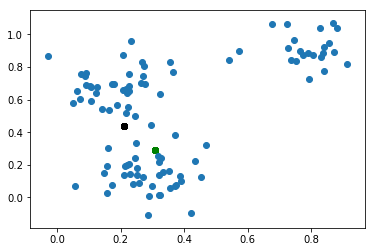

In [19]:
plt.scatter(x, y)
plt.show()

In [20]:
#user inputs k

k = 3
# k = 10
# k = 4
# k = 5
# k = 6
# k = 7
# k = 8
# k = 9
# k = 10

print("Value of k is:", k)

Value of k is: 3


1 0.263173540431 0.132656706245
2 0.678086226851 0.144450006351
3 0.442564758369 0.235575029985


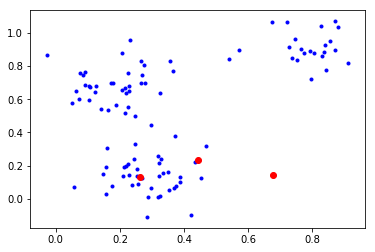

In [42]:
minX = min(x)
maxX = max(x)
minY = min(y)
maxY = max(y)

# print("Range of x: [" + str(minX) + ",", str(maxX) + "]")
# print("Range of y: [" + str(minY) + ",", str(maxY) + "]")

listClusterID = []
listCentroidX = []
listCentroidY = []
oldlistCentroidX = None
oldlistCentroidY = None

for i in range(k):
    listClusterID.append(i+1)
    listCentroidX.append(random.uniform(minX + 0.2, maxX - 0.2))
    listCentroidY.append(random.uniform(minY + 0.2, maxY - 0.2))
    
for i in range(len(listClusterID)):
    print(listClusterID[i], listCentroidX[i], listCentroidY[i])
    
plt.scatter(x, y, color='blue', marker=".")
plt.scatter(listCentroidX, listCentroidY, color='red')
plt.show()

In [43]:
def computeEuclidean(x1, y1, x2, y2):
    return math.sqrt(math.pow(x1-x2, 2) + math.pow(y1 - y2, 2))

In [44]:
listDistances = [[] for i in range(len(listClusterID))]
assignment = [ -1 for i in range(len(id_num))]

In [45]:
for i in range(len(id_num)):
    minDist = 100
    for m in range(len(listClusterID)):
        distance = computeEuclidean(x[i], y[i], listCentroidX[m], listCentroidY[m])
#         print("Instance:", i,", Cluster:", m+1, "Distance:", distance)
        if(minDist > distance):
            minDist = distance
            assignment[i] = m + 1
#     print("Assignment:", assignment)
    if(assignment[i] == 1):
        plt.scatter([x[i]], [y[i]], color = 'black', marker='.')
        plt.scatter([listCentroidX[0]], [listCentroidY[0]], color= 'black', marker='o')
    elif(assignment[i] == 2):
        plt.scatter([x[i]], [y[i]], color = 'red', marker='.')
        plt.scatter([listCentroidX[1]], [listCentroidY[1]], color= 'red', marker='o')
    else:
        plt.scatter([x[i]], [y[i]], color = 'green', marker='.')
        plt.scatter([listCentroidX[2]], [listCentroidY[2]], color= 'green', marker='o')

In [46]:
def getSSE(assignment, x, y, listClusterID, listCentroidX, listCentroidY):
    sse = 0
#     print(assignment)
#     print(listClusterID)
    for c_id in range(len(listClusterID)):
        for point in range(len(assignment)):
            if(assignment[point] == listClusterID[c_id]):
                sse = sse + computeEuclidean(listCentroidX[c_id], listCentroidY[c_id], x[point], y[point])*computeEuclidean(listCentroidX[c_id], listCentroidY[c_id], x[point], y[point])
    return sse

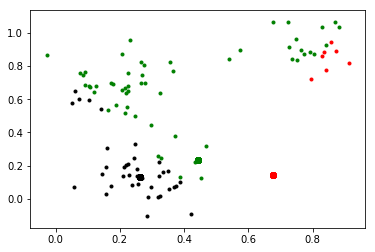

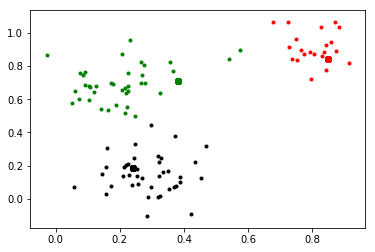

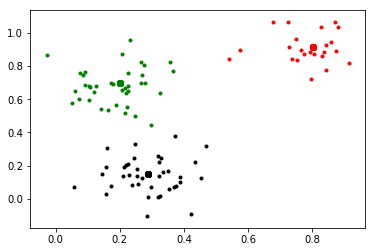

In [47]:
 plt.show()

# print("SSE", getSSE(assignment, x, y, listClusterID, listCentroidX, listCentroidY))

for t in range(1,25):
    
    #update step
    for num in range(len(listClusterID)):
    #     print("Updating centroid", k+1)
        sumX = 0
        totalX = 0.00001
        sumY = 0
        totalY = 0.00001
        for i in range(len(id_num)):
            if(assignment[i] == num+1):
                sumX = sumX + x[i]
                totalX = totalX + 1
                sumY = sumY + y[i]
                totalY = totalY + 1
        listCentroidX[num] = sumX/totalX
        listCentroidY[num] = sumY/totalY
        
        
    #assignment
    for i in range(len(id_num)):
        minDist = 100
        for m in range(len(listClusterID)):
            distance = computeEuclidean(x[i], y[i], listCentroidX[m], listCentroidY[m])
    #         print("Instance:", i,", Cluster:", m+1, "Distance:", distance)
            if(minDist > distance):
                minDist = distance
                assignment[i] = m + 1
    #     print("Assignment:", assignment)
        if(assignment[i] == 1):
            plt.scatter([x[i]], [y[i]], color = 'black', marker='.')
            plt.scatter([listCentroidX[0]], [listCentroidY[0]], color= 'black', marker='o')
        elif(assignment[i] == 2):
            plt.scatter([x[i]], [y[i]], color = 'red', marker='.')
            plt.scatter([listCentroidX[1]], [listCentroidY[1]], color= 'red', marker='o')
        else:
            plt.scatter([x[i]], [y[i]], color = 'green', marker='.')
            plt.scatter([listCentroidX[2]], [listCentroidY[2]], color= 'green', marker='o')
    plt.show()
#     print("SSE", getSSE(assignment, x, y, listClusterID, listCentroidX, listCentroidY))
#     for i in range(len(listClusterID)):
#         print(listClusterID[i], listCentroidX[i], listCentroidY[i])    
    
    if(listCentroidX == oldlistCentroidX and listCentroidY == oldlistCentroidY):
        break
    else:
        oldlistCentroidX = listCentroidX
        oldlistCentroidY = listCentroidY
        


In [48]:
text_file = open("k-means-output.txt", "w")
for m in range(len(listClusterID)):
    string = str(m+1)+'\t\t'
    for i in range(len(id_num)):
        if(assignment[i] == listClusterID[m]):
            string = string + str(id_num[i])+','
    string = string + '\n\n'
    text_file.write(string)

sse = "SSE: "+str(getSSE(assignment, x, y, listClusterID, listCentroidX, listCentroidY))
print(sse)
text_file.write(sse)
text_file.close()

SSE: 1.9431349278964598
